# Exercise 1 – Analysis of Population Statistics

Notebook Written By: WDY (Yale-NUS '24)
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with the dataset from the United Nations Population Division. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

## Step 1: Insert dataset into the Notebook

After inserting dataset, play aronud with the dataset and find some relationships if possible.

In [3]:
country_info <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 1 - Analyzing Continents and Populations/country_info.csv")

# Check the dimensions of the dataset
dim(country_info)

# Check the names of the columns
names(country_info)

# Take a sample look of the dataset
head(country_info)

# Check the unique continents
unique(country_info$continent)

[1] 193   4

[1] "country"    "continent"  "pop"        "electr_pct"

country,continent,pop,electr_pct
Burundi,Africa,11890784,7.59
Comoros,Africa,869601,77.80
Djibouti,Africa,988000,51.80
Eritrea,Africa,3546421,46.70
Ethiopia,Africa,114963588,42.90
Kenya,Africa,53771296,56.00


[1] Africa   Asia     Americas Oceania  Europe  
Levels: Africa Americas Asia Europe Oceania

## Step 2: Find Europe's Population

In [5]:
# Break down this into a subset of the dataset
europe_info <- country_info[country_info$continent == "Europe", ]

# Check the number of rows in the new dataset
nrow(europe_info)

head(europe_info)

# Now find Europe's total population
sum(europe_info$pop)

[1] 43

,country,continent,pop,electr_pct
149,Belarus,Europe,9449323,100
150,Bulgaria,Europe,6948445,100
151,Czechia,Europe,10708981,100
152,Hungary,Europe,9660351,100
153,Poland,Europe,37846611,100
154,Republic of Moldova,Europe,4033963,100


[1] 747293775

So there are about 747 Million Europeans.

## Step 3: Find Asia's Population

In [8]:
sum(country_info$pop[country_info$continent == "Asia"])

[1] 4609091684

So there are about 4.6 Billion Asians. Cool.

### New Function!

So it turns out, R can do the entire calculation with aggregate()!

We will be exploring this function in the practices later!

## Step 4: Plot a barplot of the population by continents

It may be better to use an aggregate function to get the populations by continent and assign it to a new dataset further.

continent,pop
Africa,1337666440
Americas,1018121141
Asia,4609091684
Europe,747293775
Oceania,41798096


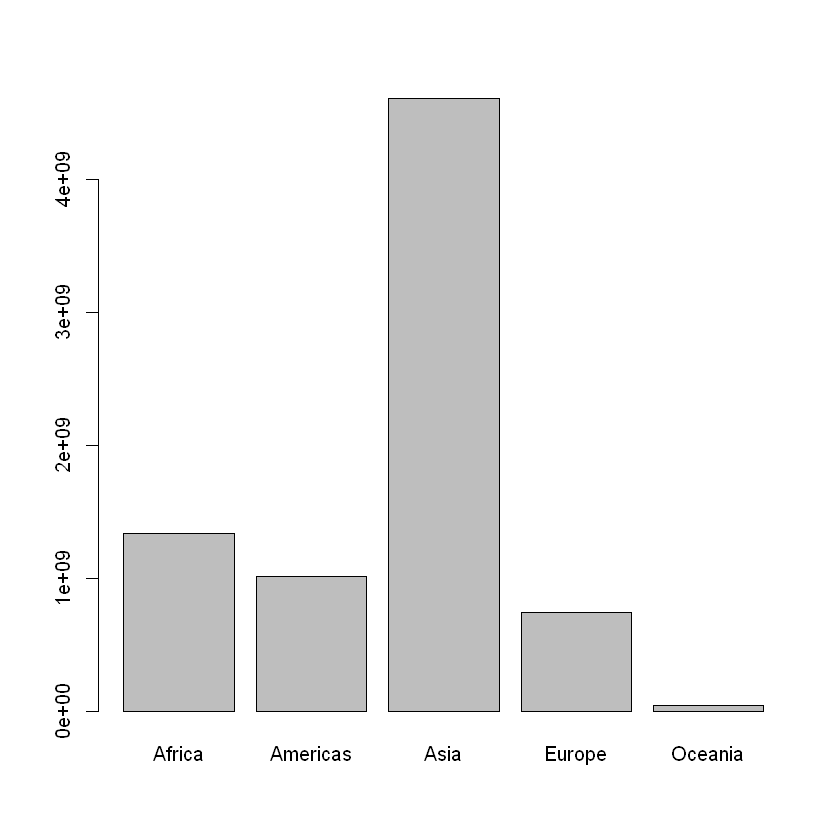

In [12]:
# aggregate(column as a subset of column, data, formula)
pop_by_cont <- aggregate(pop ~ continent, data = country_info, FUN = sum)
head(pop_by_cont)

# names.arg gives the names of the rows
barplot(pop_by_cont$pop, 
        names.arg = pop_by_cont$continent)

## Step 5: How many people in the world have some access to electricity?

Find the total population with access to electricity.

In [19]:
# Create a column with electricity statistics

country_info$pop_with_electr <- country_info$pop * country_info$electr_pct / 100

total_pop <- sum(country_info$pop_with_electr)
total_pop


[1] 6740892816

Now find the total percentage.

In [23]:
total_percentage <- total_pop / sum(country_info$pop) * 100
total_percentage

[1] 86.93472

## Step 6: Analyse the primary school demographics of the population!

For this, importing a new dataset is necessary. Download the file primary_education.csv from Canvas 

In [24]:
primary_education <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 1 - Analyzing Continents and Populations/primary_education.csv")

In [26]:
# Look through the dataset
dim(primary_education)
names(primary_education)
head(primary_education)

[1] 117   4

[1] "country"          "income"           "completion_f_pct" "f_age_last_grade"

country,income,completion_f_pct,f_age_last_grade
Albania,upper middle,104.64122,18102.0
Argentina,not classified,102.76964,349201.0
Armenia,lower middle,91.29588,16380.6
Austria,high,99.59905,40829.6
Azerbaijan,upper middle,109.72021,59122.8
Burundi,low,74.52029,127731.8


You may be wondering why the output above shows a completion rate of >100% in some countries. Here is a quote from https://data.worldbank.org/indicator/SE.PRM.CMPT.FE.ZS:

“There are many reasons why the primary completion rate can exceed 100 percent. The numerator may include late entrants and overage children who have repeated one or more grades of primary education as well as children who entered school early, while the denominator is the number of children at the entrance age for the last grade of primary education.

## Step 7: Create a subset that contains low-income countries

In [30]:
low_income <- primary_education[primary_education$income == "low", ]
nrow(low_income)
str(low_income)

[1] 16

'data.frame':	16 obs. of  4 variables:
 $ country         : Factor w/ 117 levels "Albania","Algeria",..: 16 11 15 20 44 39 66 69 79 78 ...
 $ income          : Factor w/ 5 levels "high","low","lower middle",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ completion_f_pct: num  74.5 76 64.1 33.5 52.4 ...
 $ f_age_last_grade: num  127732 132165 236609 62497 154588 ...


## Step 8: How many girls completed primary school education in low income countries?

Find the percentage of girls that completed primary school education in low income countries. 

In [31]:
# If above 100, change the score to 100.

for (i in 1:length(primary_education$completion_f_pct)) {
    if (primary_education$completion_f_pct[i] > 100) {
        primary_education$completion_f_pct[i] <- 100
    }
}

total_percentage <- mean(primary_education$completion_f_pct[primary_education$income == "low"])
total_percentage

[1] 62.93614

# THANK YOU FOR VIEWING THIS NOTEBOOK :-)